In [1]:
import screed
import matplotlib.pyplot as plt
from mpltools import style
import numpy as np
%matplotlib inline

In [2]:
%%bash
pigz -k -d -p 20 /var/seq_data/priming_exp/RawData/Seq4/seq4_read?.fastq.gz

pigz abort: write error on /var/seq_data/priming_exp/RawData/Seq4/seq4_read1.fastq


In [3]:
%%bash
pear -m 600 -j 20 \
-f /var/seq_data/priming_exp/RawData/Seq4/seq4_read2.fastq \
-r /var/seq_data/priming_exp/RawData/Seq4/seq4_read1.fastq \
-o /var/seq_data/priming_exp/data/seq4_pear_merged-$(date +%F)

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\

PEAR v0.9.2 [March 26 2014]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

Forward reads file.................: /var/seq_data/priming_exp/RawData/Seq4/seq4_read2.fastq
Reverse reads file.................: /var/seq_data/priming_exp/RawData/Seq4/seq4_read1.fastq
PHRED..............................: 33
Using empirical frequencies........: YES
Statistical method.................: OES
Maximum assembly length............: 600
Minimum assembly length............: 50
p-value............................: 0.010000
Quality score threshold (trimming).: 0
Minimum read size after trimming...: 1
Maximal ratio of uncalled bases....: 1.000000
Minimum overlap....................: 10
Scoring method.....................: Scaled score
Threads......................

In [4]:
fn = "/var/seq_data/priming_exp/data/seq4_pear_merged-2014-07-28.assembled.fastq"

In [5]:
lengths = []
for read in screed.open(fn):
    lengths.append((len(read["sequence"])))

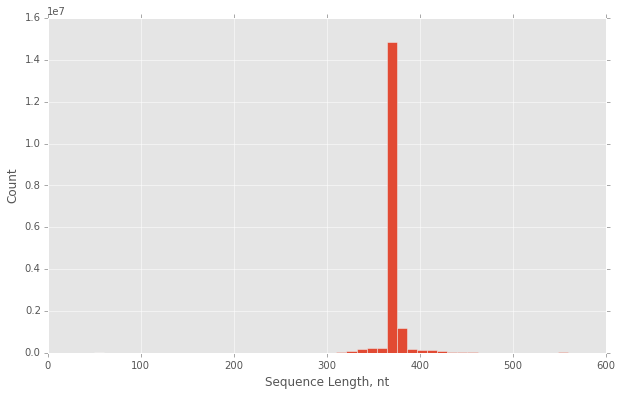

In [6]:
style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(111)
h = ax.hist(np.array(lengths), bins=50)
xl = ax.set_xlabel("Sequence Length, nt")
yl = ax.set_ylabel("Count")
fig.set_size_inches((10,6))